In [29]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

RUTA_DATOS = '~/orga-datos/datos_navent_fiuba'

In [30]:
#Se cargan los datos en un data frame de los postulantes, con su titulo y en que estado se encuentra
df_postulantes_educacion = pd.read_csv(RUTA_DATOS + '/fiuba_1_postulantes_educacion.csv')
df_postulantes_educacion.head(1)
df_postulantes_educacion['estado'] = df_postulantes_educacion['estado'].astype('category')


In [31]:
#Nos quedamos unicamente con los Universitarios
df_postulantes_universitarios = df_postulantes_educacion[df_postulantes_educacion['nombre'] == 'Universitario']

df_postulantes_universitarios.head(1)
len(df_postulantes_universitarios)

104295

In [32]:
df_postulantes_no_universitarios= df_postulantes_educacion[df_postulantes_educacion['nombre'] != 'Universitario']
len(df_postulantes_no_universitarios)

193936

In [46]:
#Para un analisis mas detallado, separamos a los universitarios en 3 categorias
#Universitarios En Curso.
df_universitarios_en_curso = df_postulantes_universitarios[df_postulantes_universitarios['estado'] == 'En Curso']
#Universitarios Graduados
df_universitarios_graduado = df_postulantes_universitarios[df_postulantes_universitarios['estado'] == 'Graduado']
#Universitarios Abandonado
df_universitarios_abandonado = df_postulantes_universitarios[df_postulantes_universitarios['estado'] == 'Abandonado'] 

In [47]:
#Veo la cantidad de datos de cada categoria
print('La cantidad de universitarios en curso es: '+ str(len(df_universitarios_en_curso)))
print('La cantidad de universitarios graduados es: '+ str(len(df_universitarios_graduado)))
print('La cantidad de universitarios abandonado es: '+ str(len(df_universitarios_abandonado)))

La cantidad de universitarios en curso es: 50733
La cantidad de universitarios graduados es: 38607
La cantidad de universitarios abandonado es: 14955


In [35]:
#Por la cantidad de datos que tenemos, podemos ver que las conclusiones que obtengamos de los
#universitarios en curso sera la mas precisa, luego la de los graduados y finalmente la mas 
#impresisa sera la de los que abandonaron

In [36]:
#Se cargan los datos en un data frame de los postulantes, con su genero y edad
df_postulantes_genero_y_edad = pd.read_csv(RUTA_DATOS + '/fiuba_2_postulantes_genero_y_edad.csv')
df_postulantes_genero_y_edad.head(1)

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM


In [48]:
len(df_universitarios_en_curso)
len(df_postulantes_genero_y_edad)
df_uni_y_edad = pd.merge(df_universitarios_en_curso, df_postulantes_genero_y_edad, on = 'idpostulante', how = 'left')
len(df_uni_y_edad)

In [51]:
(df_uni_y_edad['sexo'] == 'FEM').value_counts()

True     29175
False    21558
Name: sexo, dtype: int64

In [49]:
#Realizo un merge por la columna 'idpostulante' quedandome solo con los universitarios (separado en categorias)
#Comienzo con los universitarios en curso
df_universitarios_en_curso = pd.merge(df_universitarios_en_curso,df_postulantes_genero_y_edad, on = 'idpostulante',how = 'left')

In [50]:
edad = df_universitarios_en_curso.fechanacimiento.str.split('-').str.get(0)
edad = edad.dropna(0)
edad = 2018 - pd.to_numeric(edad)
print('Edad promedio', edad.mean())
print('Edad máxima', edad.max()) #deberia eliminar el 2014
print('Edad mínima', edad.min())
edad = edad[(edad < 1985)]
print('Edad máxima', edad.max())
print('Edad promedio', edad.mean())
print('Cantidad', len(edad))
len(df_universitarios_en_curso)

Edad promedio 27.4911905713
Edad máxima 2014
Edad mínima 18
Edad máxima 66
Edad promedio 27.3728749226
Cantidad 50057


50733

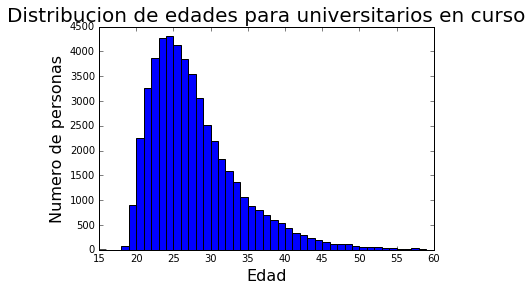

In [11]:
#La edad minima dio un resultado logico mientras que la maximo dio uno absurdo. Se filtraran los 
#datos dando una edad maxima de 80 años.
edad.plot.hist(bins =range(15,60))
plt.title('Distribucion de edades para universitarios en curso', fontsize = 20)
plt.xlabel('Edad', fontsize=16)
plt.ylabel('Numero de personas', fontsize=16)

In [12]:
#Realizo un merge por la columna 'idpostulante' quedandome solo con los universitarios (separado en categorias)
#Comienzo con los universitarios graduados
df_universitarios_graduado = pd.merge(df_universitarios_graduado,df_postulantes_genero_y_edad, on = 'idpostulante',how = 'left')

In [13]:
edad = df_universitarios_graduado.fechanacimiento.str.split('-').str.get(0)
edad = edad.dropna(0)
edad = 2018 - pd.to_numeric(edad)
print(edad.mean())
print(edad.max()) 
print(edad.min())
edad = edad[(edad > 18)]
print(edad.mean())
print(edad.min())
print(len(edad))

34.043818139
97
12
34.0460725865
19
38244


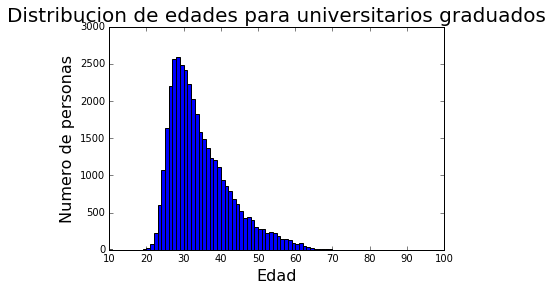

In [14]:
#(Lo mas logico es que la max y min sean anomalias pero las dejo, grafico aso)
edad.plot.hist(bins =range(10,100))
plt.title('Distribucion de edades para universitarios graduados', fontsize = 20)
plt.xlabel('Edad', fontsize=16)
plt.ylabel('Numero de personas', fontsize=16)

In [15]:
#Realizo un merge por la columna 'idpostulante' quedandome solo con los universitarios (separado en categorias)
#Comienzo con los universitarios que abandonaron
df_universitarios_abandonado = pd.merge(df_universitarios_abandonado ,df_postulantes_genero_y_edad, on = 'idpostulante',how = 'left')

In [16]:
edad = df_universitarios_abandonado.fechanacimiento.str.split('-').str.get(0)
edad = edad.dropna(0)
edad = 2018 - pd.to_numeric(edad)
print(edad.mean())
print(edad.max())
print(edad.min())
print(len(edad))

33.4091553575
75
18
14811


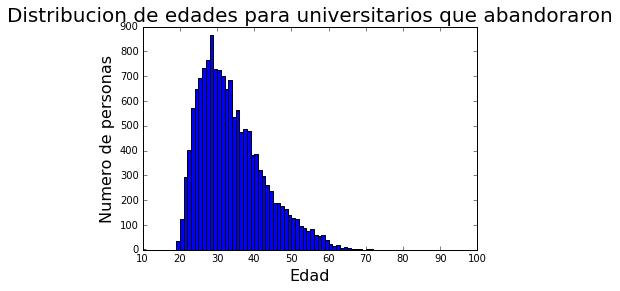

In [17]:
#Parecen resultados aceptables
edad.plot.hist(bins =range(10,100))
plt.title('Distribucion de edades para universitarios que abandoraron', fontsize = 20)
plt.xlabel('Edad', fontsize=16)
plt.ylabel('Numero de personas', fontsize=16)

In [18]:
#Se puede concluir que independientemente de si los unviersitarios estan en curso, son graduados
#o abandonaron, la mayor cantidad de postulantes se encuentran entre los 20 y 40 años de edad.  
#(MAS O MENOS HAY QUE SUPERPONER GRAFICOS CON EL SEABORN)

In [19]:
#Se podria continuar viendo el promedio de postulaciones de cada categoria por persona y viendo en que tiempo fueron estas postulaciones
#Se podria ver cuales son los trabajos mas buscados por cada categoria y su rango laboral
#Se podria ver lo mas buscado dependiedno el sexo(?)


In [20]:
#Se vera el promedio de postulaciones de los usuarios de cada categoria. Para eso comienzo importante el csv de postulaciones y realizo un merge
df_postulaciones = pd.read_csv(RUTA_DATOS + '/fiuba_4_postulaciones.csv')
df_postulaciones.head(1)

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34


In [21]:
df_universitarios_en_curso = pd.merge(df_universitarios_en_curso,df_postulaciones, on = 'idpostulante',how = 'left')
df_universitarios_en_curso.head(1)

,idpostulante,nombre,estado,fechanacimiento,sexo,idaviso,fechapostulacion
0,8BkL,Universitario,En Curso,1976-07-21,FEM,1112266605,2018-01-18 09:56:10


In [22]:
df_universitarios_en_curso.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 976326 entries, 0 to 976325
Data columns (total 7 columns):
idpostulante        976326 non-null object
nombre              976326 non-null object
estado              976326 non-null category
fechanacimiento     968436 non-null object
sexo                976326 non-null object
idaviso             976326 non-null int64
fechapostulacion    976326 non-null object
dtypes: category(1), int64(1), object(5)
memory usage: 53.1+ MB


In [143]:
df_universitarios_en_curso.groupby('idpostulante')['idaviso'].value_counts().head(1)
#quiero sacar el promedio de postulaciones por usuario
#igual para los graduados y en curso
#despues quiero sacar el promedio de visitas 
#se podria realizar un grafico con las postulaciones de cada usuario y superponer con uno de vistitas

idpostulante  idaviso   
0zB0Xwd       1110915410    1
Name: idaviso, dtype: int64